# Exploratory Data Analysis

This notebook contains code for performing exploratory data analysis (EDA) on the dataset. The EDA process includes data visualization, summary statistics, and insights derived from the data.

## Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## Load dataset

In [62]:
df_path = "../data/housing.csv"
df = pd.read_csv(df_path)
print(df.shape)

(20640, 10)


In [63]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Analysis

We have to check the dtypes an non-null count

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can check that exist an incomplete column "total_bedrooms" and a category variable "ocean_proximity"

In [65]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

We decide to drop the 'ISLAND' from the column 'ocean_proximity' for simplicity in this example.

In [66]:
df = df[df['ocean_proximity'] != 'ISLAND']

We have to exclude the no numeric variable

In [67]:
df_numeric = df.copy()
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()
df_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [68]:
df_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

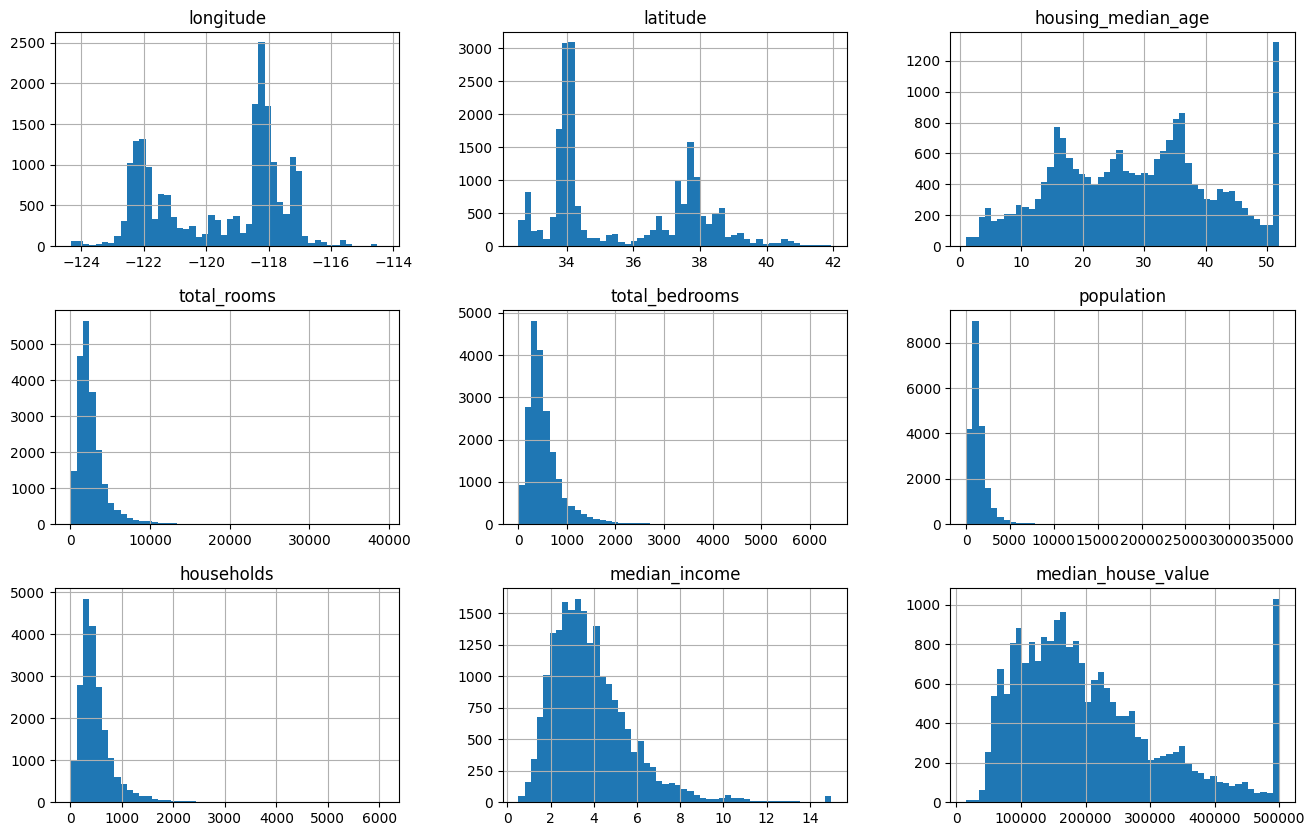

In [69]:
df_numeric.hist(figsize=(16,10), bins=50)

In [70]:
df_numeric['median_house_value'].describe()

count     20635.000000
mean     206813.756288
std      115372.499511
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

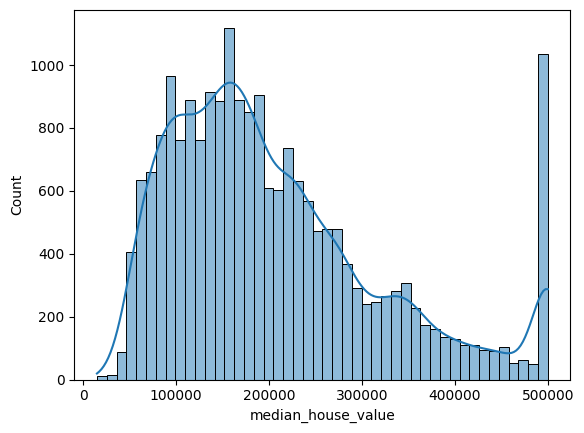

In [71]:
sns.histplot(df_numeric['median_house_value'], kde=True)

We have to look how it see the geographic distribution of the data

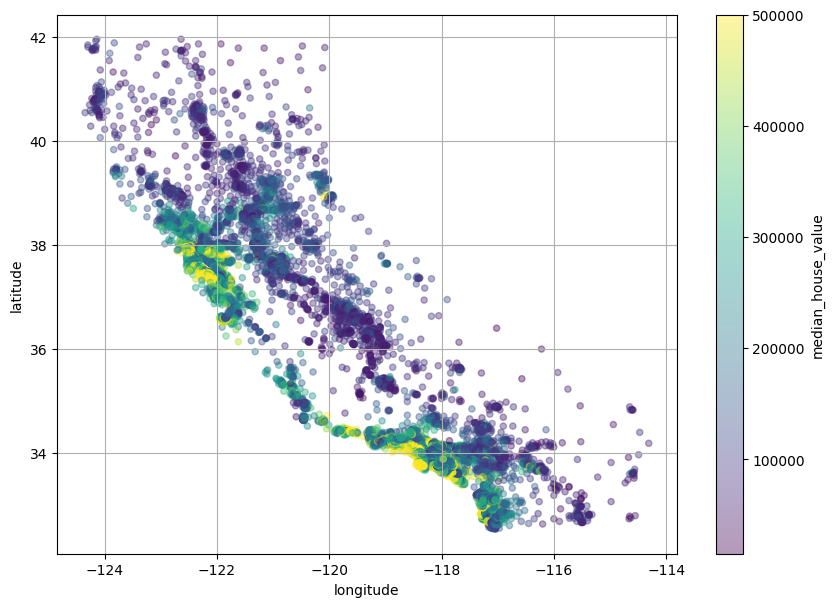

In [72]:
df_numeric.plot.scatter(x='longitude', 
                y='latitude', 
                alpha=0.4, 
                figsize=(10, 7), 
                c='median_house_value', 
                cmap='viridis',
                grid=True,)
plt.show()

## Correlations analysis

We have to generate a correlatiosn heat for analysis how variable behave with each other

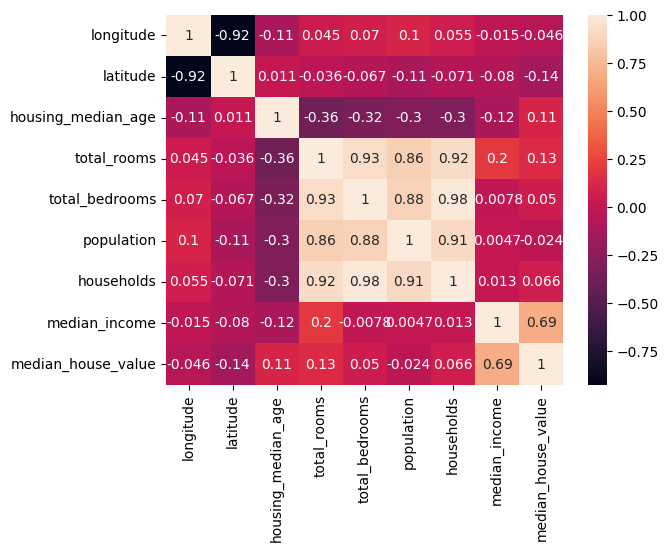

In [73]:
corr = df_numeric.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [74]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688563
total_rooms           0.134373
housing_median_age    0.105272
households            0.066069
total_bedrooms        0.049792
population           -0.024421
longitude            -0.046208
latitude             -0.143837
Name: median_house_value, dtype: float64

We'll make a pairplot to check the behavior of the variables, in this case the amount of variables aren't a lot, so is possible to check graphically

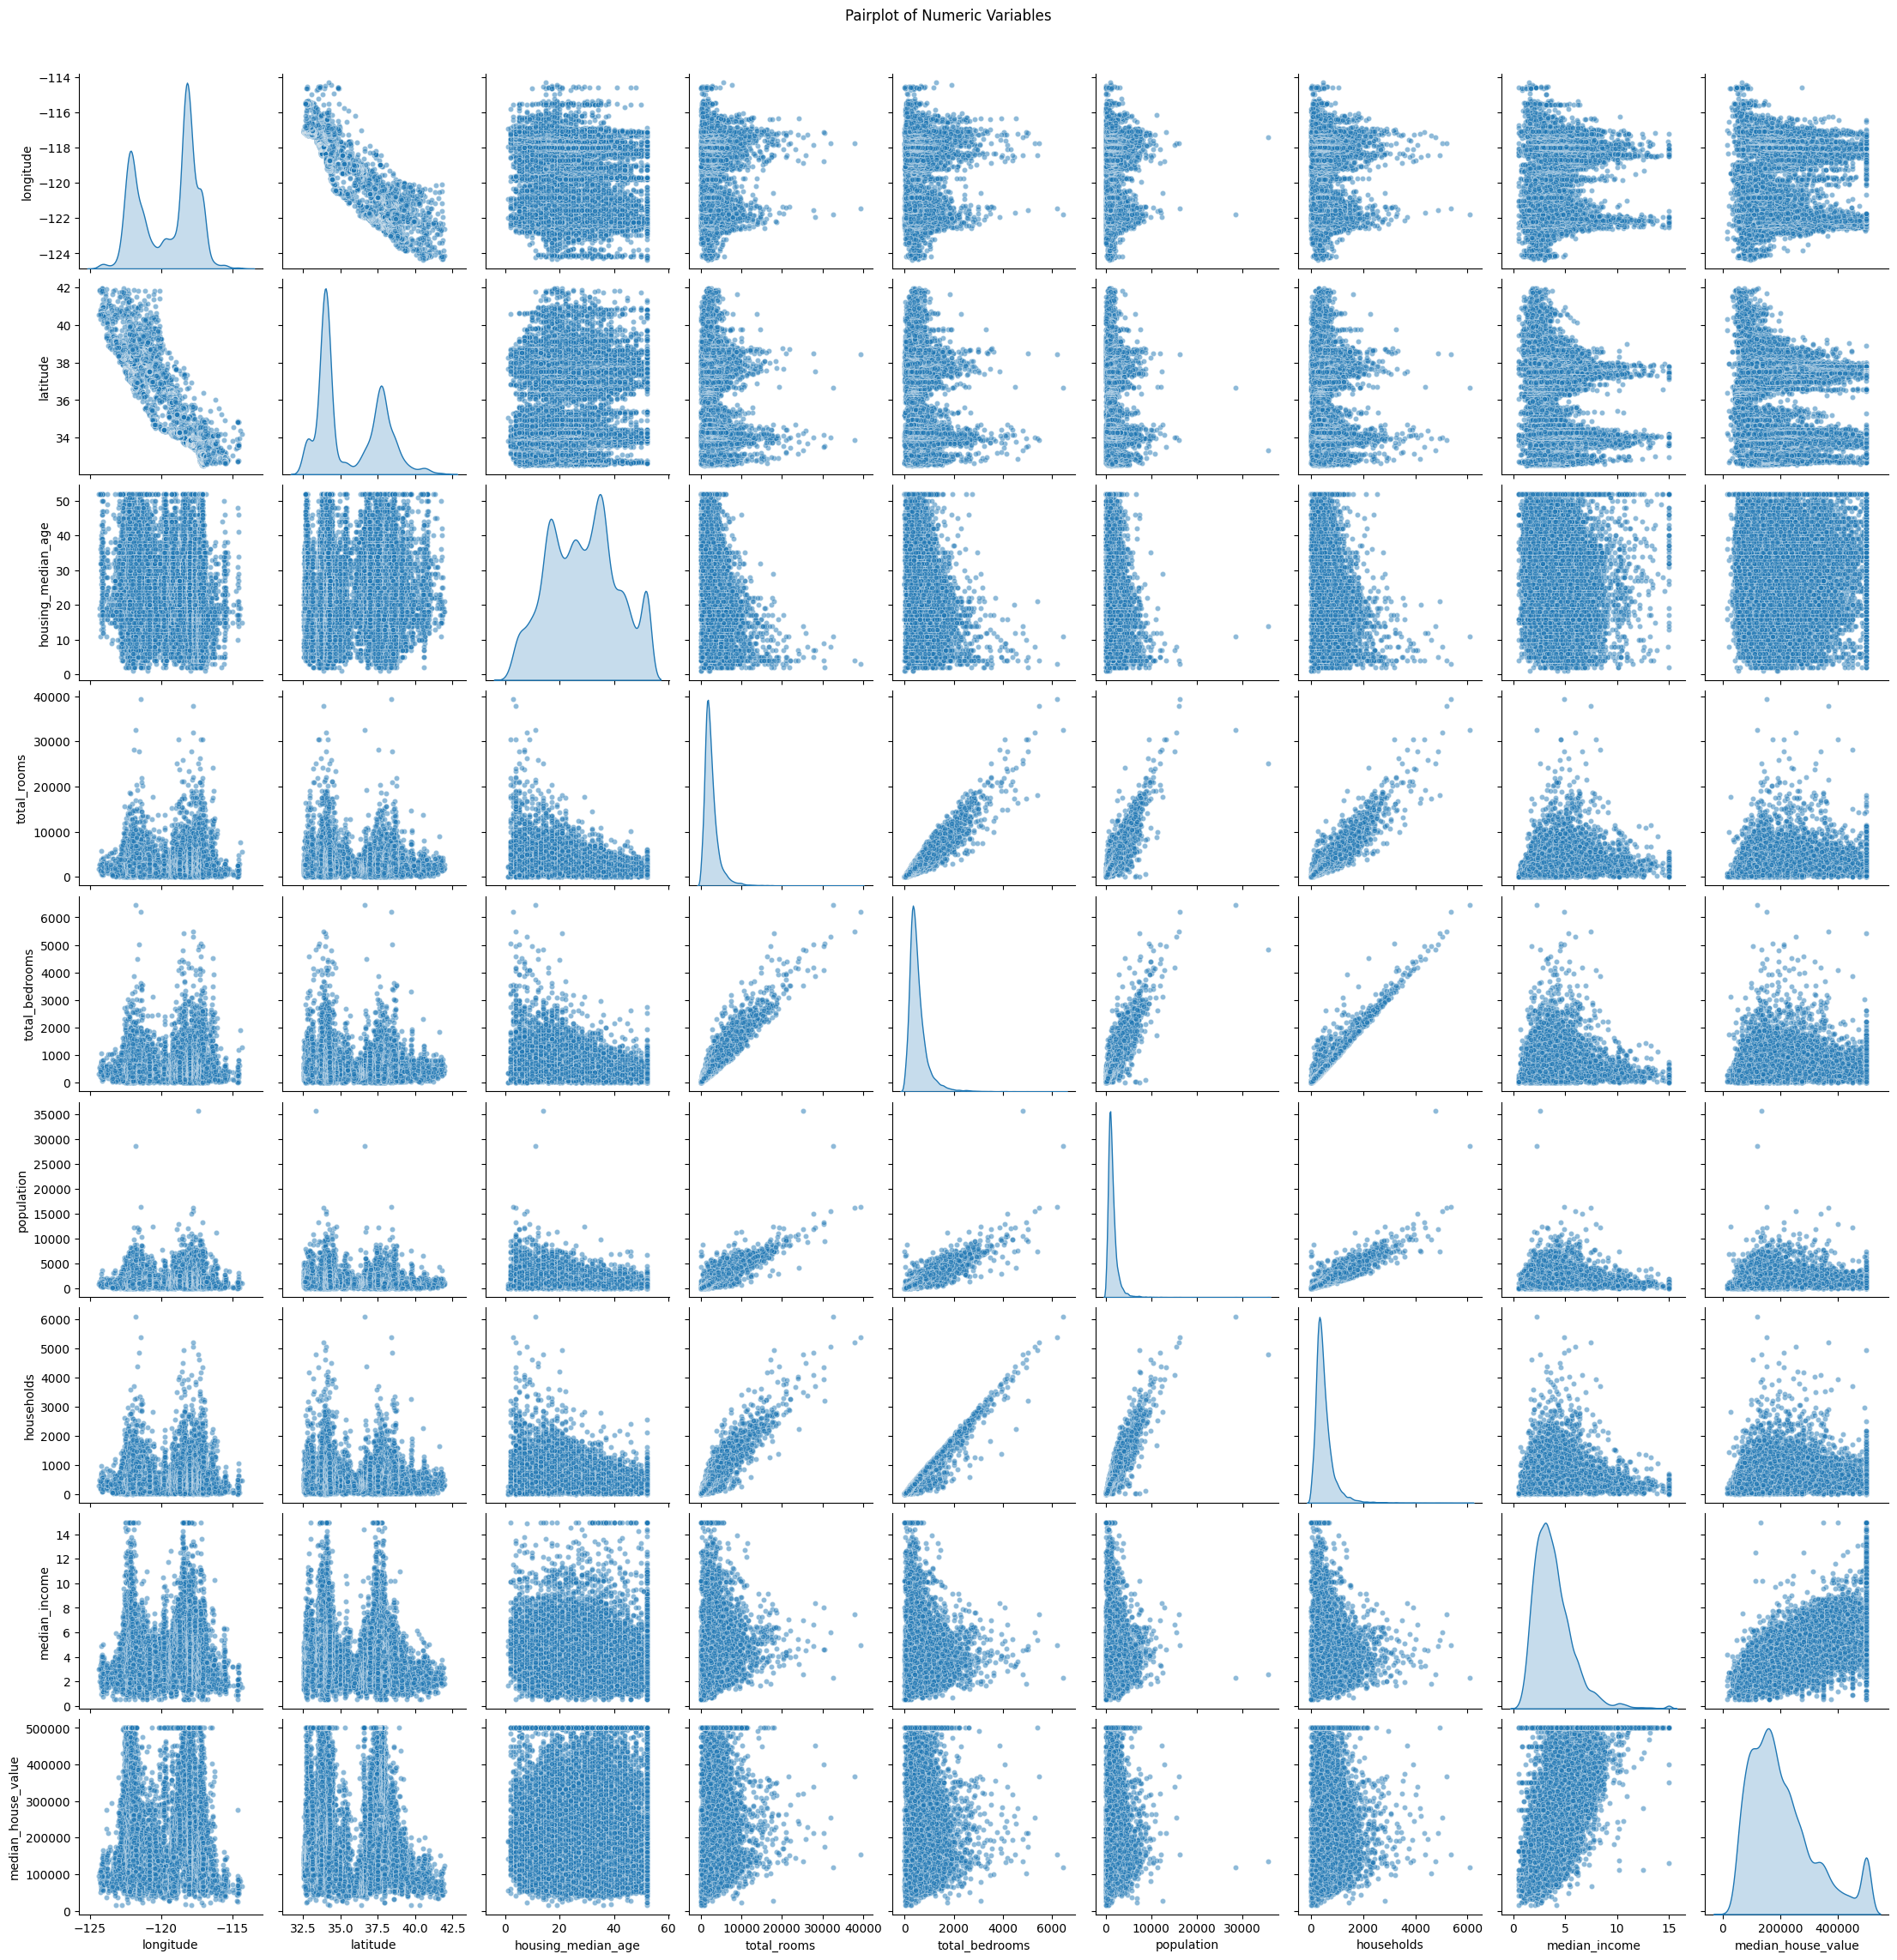

In [75]:
sns.pairplot(df_numeric, diag_kind="kde", plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

## Impute and Split Data

We are going to impute the data to the variable "total_bedrooms", we decide to impute to the median values to the total of register

In [76]:
median_bedrooms = df_numeric['total_bedrooms'].median()
df_numeric['total_bedrooms'] = df_numeric['total_bedrooms'].fillna(median_bedrooms)

In [77]:
df_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,536.867071,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,419.432146,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,297.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,644.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Encoder

In [78]:
housing_cat = df[['ocean_proximity']].copy()
one_cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_encoded = one_cat_encoder.fit_transform(housing_cat)


In [79]:
encoded_df = pd.DataFrame(housing_cat_encoded,
                          columns=one_cat_encoder.get_feature_names_out(['ocean_proximity']),
                          index=housing_cat.index)

In [80]:
encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
20635,0.0,1.0,0.0,0.0
20636,0.0,1.0,0.0,0.0
20637,0.0,1.0,0.0,0.0
20638,0.0,1.0,0.0,0.0


## Feature scaling and transformation

We have transform the numpy array to a dataframe

In [83]:
min_min_max_scaler = MinMaxScaler(feature_range=(-1,1))
df_numeric_scaled = min_min_max_scaler.fit_transform(df_numeric)

In [85]:
df_numeric_scaled = pd.DataFrame(df_numeric_scaled,columns=df_numeric.columns, index=df_numeric.index)
df_numeric_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.577689,0.134963,0.568627,-0.955339,-0.960273,-0.982118,-0.958888,0.079337,0.804533
1,-0.575697,0.130712,-0.215686,-0.638995,-0.657045,-0.865579,-0.626048,0.076054,0.416493
2,-0.579681,0.128587,1.000000,-0.925479,-0.941341,-0.972365,-0.942115,-0.067944,0.390101
3,-0.581673,0.128587,1.000000,-0.935297,-0.927374,-0.968889,-0.928301,-0.290603,0.345566
4,-0.581673,0.128587,1.000000,-0.917341,-0.913408,-0.968497,-0.915146,-0.538448,0.349277
...,...,...,...,...,...,...,...,...,...
20635,-0.350598,0.475027,-0.058824,-0.915408,-0.884233,-0.952801,-0.891794,-0.853740,-0.739791
20636,-0.374502,0.477152,-0.333333,-0.964647,-0.953755,-0.980212,-0.962835,-0.716294,-0.743914
20637,-0.376494,0.464400,-0.372549,-0.885447,-0.849783,-0.943720,-0.857918,-0.834471,-0.681234
20638,-0.396414,0.464400,-0.333333,-0.905489,-0.873371,-0.958631,-0.885545,-0.811409,-0.712574


Then we have to concat both arrays

In [86]:
df_scaled = pd.concat([df_numeric_scaled, encoded_df], axis=1)
df_scaled.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.577689,0.134963,0.568627,-0.955339,-0.960273,-0.982118,-0.958888,0.079337,0.804533,0.0,0.0,1.0,0.0
1,-0.575697,0.130712,-0.215686,-0.638995,-0.657045,-0.865579,-0.626048,0.076054,0.416493,0.0,0.0,1.0,0.0
2,-0.579681,0.128587,1.000000,-0.925479,-0.941341,-0.972365,-0.942115,-0.067944,0.390101,0.0,0.0,1.0,0.0
3,-0.581673,0.128587,1.000000,-0.935297,-0.927374,-0.968889,-0.928301,-0.290603,0.345566,0.0,0.0,1.0,0.0
4,-0.581673,0.128587,1.000000,-0.917341,-0.913408,-0.968497,-0.915146,-0.538448,0.349277,0.0,0.0,1.0,0.0


In [87]:
X = df_scaled.drop('median_house_value', axis = 1)
y = df_scaled['median_house_value']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Models

## Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
lr_score = reg.score(X_test, y_test)
lr_score

0.637459562123958

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
rf_reg.score(X_test, y_test)

0.8353800645777769